Merged Data Columns:
['ID', 'C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk', 'Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

Existing columns in merged data:
['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk', 'Optm', 'Usef']
Correlation with Optimism:
C_we   -0.022802
C_wk   -0.020932
G_we   -0.021130
G_wk   -0.037455
S_we   -0.066595
S_wk   -0.072042
T_we   -0.046402
T_wk   -0.056422
Name: Optm, dtype: float64

Correlation with Feeling Useful:
C_we   -0.038151
C_wk   -0.044476
G_we    0.029733
G_wk    0.006776
S_we   -0.139673
S_wk   -0.146060
T_we   -0.064004
T_wk   -0.077676
Name: Usef, dtype: float64


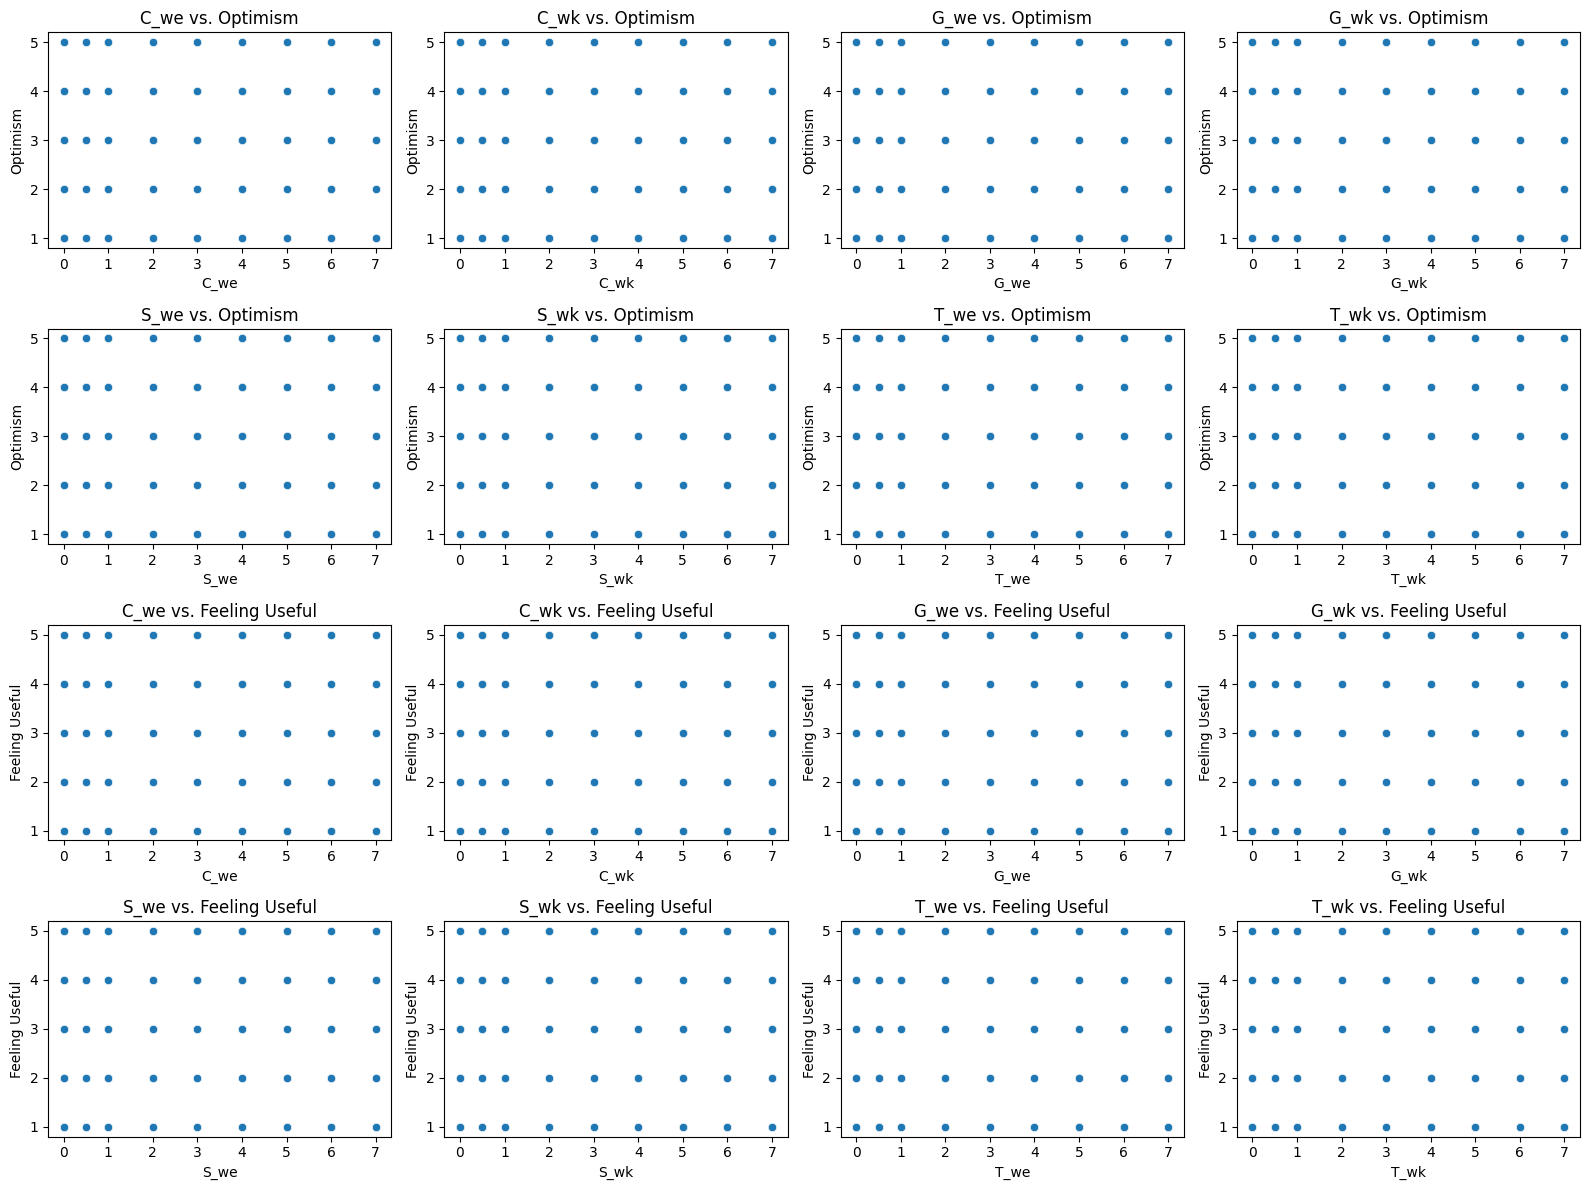

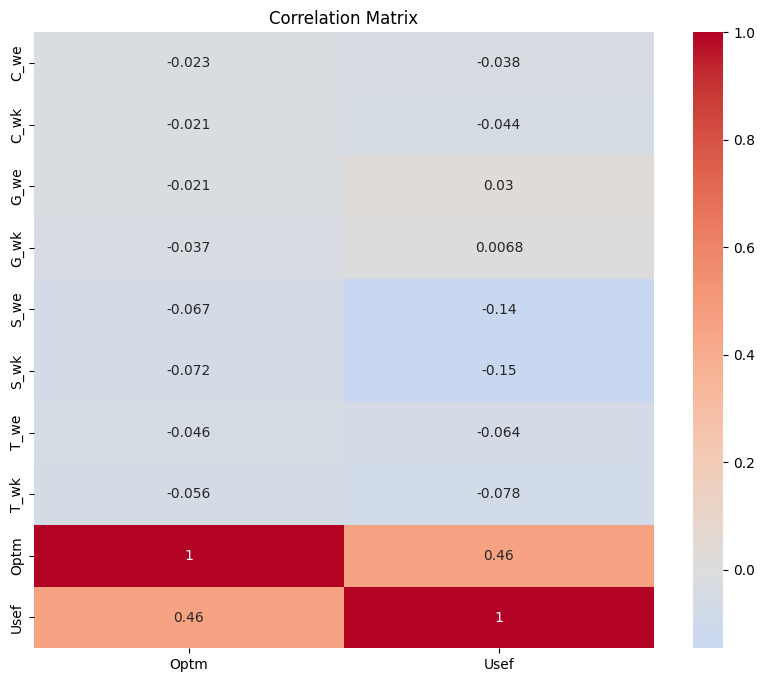

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
screen_time_data = pd.read_csv('dataset2.csv')  # Contains screen time data
well_being_data = pd.read_csv('dataset3.csv')   # Contains well-being indicators

# Merge datasets on ID
merged_data = pd.merge(screen_time_data, well_being_data, on='ID')

# Print the columns of the merged DataFrame
print("Merged Data Columns:")
print(merged_data.columns.tolist())

# List of expected screen time and well-being columns
expected_columns = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk', 'Optm', 'Usef']

# Check which expected columns are actually in the merged DataFrame
existing_columns = [col for col in expected_columns if col in merged_data.columns]
print("\nExisting columns in merged data:")
print(existing_columns)

# Define screen time variables
screen_time_vars = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']

# Ensure the DataFrame has the necessary columns for correlation analysis
if all(col in merged_data.columns for col in expected_columns):
    # Calculate correlations between screen time and well-being indicators
    correlation_data = merged_data[expected_columns].corr()

    # Extract correlations with well-being indicators
    correlation_with_optm = correlation_data['Optm'].drop(['Optm', 'Usef'])
    correlation_with_usef = correlation_data['Usef'].drop(['Optm', 'Usef'])

    # Print correlations
    print("Correlation with Optimism:")
    print(correlation_with_optm)

    print("\nCorrelation with Feeling Useful:")
    print(correlation_with_usef)

    # Plot scatter plots for each screen time variable vs. well-being indicators
    plt.figure(figsize=(16, 12))

    for i, var in enumerate(screen_time_vars, 1):
        plt.subplot(4, 4, i)
        sns.scatterplot(x=merged_data[var], y=merged_data['Optm'])
        plt.title(f'{var} vs. Optimism')
        plt.xlabel(var)
        plt.ylabel('Optimism')

        plt.subplot(4, 4, i + len(screen_time_vars))
        sns.scatterplot(x=merged_data[var], y=merged_data['Usef'])
        plt.title(f'{var} vs. Feeling Useful')
        plt.xlabel(var)
        plt.ylabel('Feeling Useful')

    plt.tight_layout()
    plt.show()

    # Plot heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_data[['Optm', 'Usef']], annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Not all expected columns are present in the data. Please check column names.")
